In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 随机抽样

已知$X \sim N(100, 3^2)$，随机抽样$50$个样本，计算均值、标准差


In [21]:
x = np.random.normal(loc=100, scale=3, size=50)
x

array([104.87303609,  98.16473076,  98.41548474,  96.78109413,
       102.59622289,  93.09538391, 105.23443529,  97.7163793 ,
       100.95711729,  99.25188887, 104.38632381,  93.81957787,
        99.03274839,  98.84783694, 103.40130833,  96.7003262 ,
        99.48271538,  97.36642475, 100.12664124, 101.74844564,
        96.69814247, 103.43417113, 102.70477216, 101.50748302,
       102.70256785,  97.94881642,  99.63132932,  97.1926917 ,
        99.19633576, 101.5910664 ,  97.92501774,  98.80973942,
        97.9384819 ,  97.46438308,  97.98626161,  99.9620062 ,
        96.64806895, 100.70324709, 104.97940653, 102.22613248,
        99.42449334,  97.33711311,  97.75852512, 105.0773638 ,
       100.15242326,  98.08901306, 100.57274645, 106.30076541,
       100.36047686, 101.85160933])

In [235]:
x.mean(), x.std(ddof=1)

(99.92345545597703, 2.9382992440521436)

计算总体标准差：

In [220]:
x.std()

2.908767848874408

计算样本标准差：

In [229]:
data = np.array([1, 2, 3, 4, 5])

print(np.std(data))  # 计算样本标准差（无偏）
print(np.std(data, ddof=1))  # 计算总体标准差


1.4142135623730951
1.5811388300841898


In [231]:
np.sqrt(((x-x.mean())**2).sum()/(x.shape[0] - 1))

2.9382992440521436

<br>

使用随机种子(seed)，将随机“固定”住。
> 当前基于图灵机、冯诺依曼体系的计算机系统都是确定性系统。<br>
> 在没有外界随机因素输入情况下，所谓的随机都是“模拟”出来的伪随机。

In [23]:
np.random.seed(1)

x = np.random.normal(size=50, loc=100, scale=3)
x

array([104.87303609,  98.16473076,  98.41548474,  96.78109413,
       102.59622289,  93.09538391, 105.23443529,  97.7163793 ,
       100.95711729,  99.25188887, 104.38632381,  93.81957787,
        99.03274839,  98.84783694, 103.40130833,  96.7003262 ,
        99.48271538,  97.36642475, 100.12664124, 101.74844564,
        96.69814247, 103.43417113, 102.70477216, 101.50748302,
       102.70256785,  97.94881642,  99.63132932,  97.1926917 ,
        99.19633576, 101.5910664 ,  97.92501774,  98.80973942,
        97.9384819 ,  97.46438308,  97.98626161,  99.9620062 ,
        96.64806895, 100.70324709, 104.97940653, 102.22613248,
        99.42449334,  97.33711311,  97.75852512, 105.0773638 ,
       100.15242326,  98.08901306, 100.57274645, 106.30076541,
       100.36047686, 101.85160933])

# 【任务2】 绘制分布的频次直方图

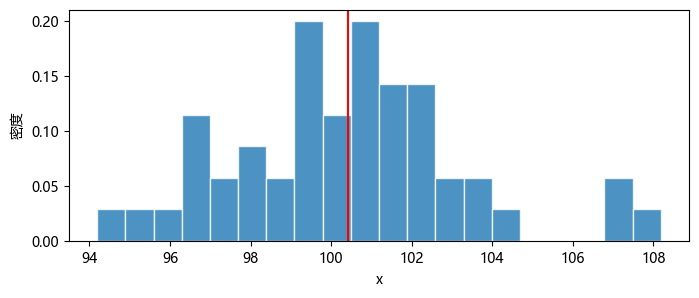

In [7]:
x = np.random.normal(size=50, loc=100, scale=3)

fig, ax = plt.subplots(figsize=(8,3))
ax.hist(x, bins=20, alpha=0.8, density=True,  ec="white");
ax.axvline(x.mean(), c="red");
ax.set_xlabel('x'); ax.set_ylabel('密度');

<br>

加上理论整体分布的密度曲线

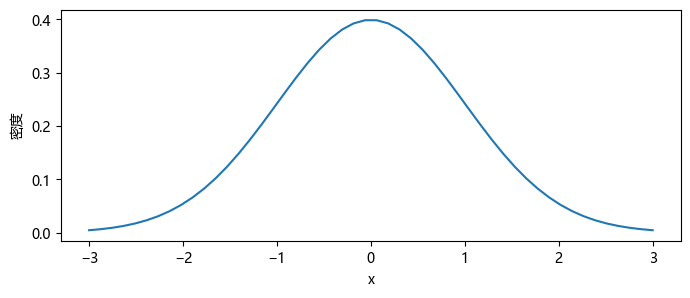

In [8]:
import scipy.stats as stats

x = np.linspace(-3, 3)
y = stats.norm.pdf(x)

fig, ax = plt.subplots(figsize=(8,3))
ax.plot(x, y);
ax.set_xlabel('x'); ax.set_ylabel('密度');

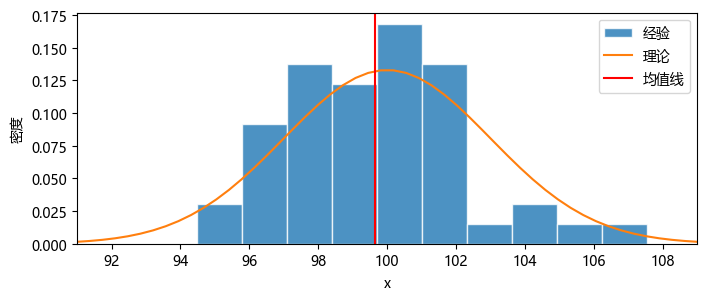

In [36]:
x = np.random.normal(size=50, loc=100, scale=3)

xx = np.linspace(100 - 3*3, 100 + 3*3)

fig, ax = plt.subplots(figsize=(8,3))
ax.hist(x, alpha=0.8, density=True,  ec="white", label='经验')
ax.plot(xx, stats.norm.pdf(xx, loc=100, scale=3), label='理论')
ax.axvline(x.mean(), c="red", label='均值线')
ax.set_xlim(100 - 3*3, 100 + 3*3)
ax.set_xlabel('x'); ax.set_ylabel('密度')
ax.legend();

# 【任务3】置信区间的实验


我有个问题，我们在概率论与数理统计课中学习的置信区间，置信水平$\alpha$是什么意思？

<br>



回忆一下估计正态分布$\mu$的置信区间的推导过程

存在随机变量$X \sim N(\mu, \sigma^2)$，抽样$x$，有$n$个样本$x_i$，其中$i=1\dots n$。

从我们已知样本均值$\bar{x}$的分布开始，因为$\bar{x}$是$\mu$的“很好”估计（无偏估计）
$$
\bar{x} \sim N\left(\mu, \frac{\sigma^2}{n}\right)
$$

使用标准化分布
$$
\frac{\bar{x} - \mu}{\sigma/\sqrt{n}} \sim N(0,1)
$$

又因为我们不知道$\sigma$，因此需要使用$s$估计$\sigma$，得到

$$
\frac{\bar{x} - \mu}{s / \sqrt{n}} \sim t(n-1)
$$

设置置信水平$\alpha$，得到两个分位点作为范围最小和最大边界点。因此得到
$$
q_{\frac{\alpha}{2}} \le \frac{\bar{x} - \mu}{s / \sqrt{n}} \le q_{1-\frac{\alpha}{2}}
$$

整理得到
$$
\bar{x} - q_{1-\frac{\alpha}{2}} s / \sqrt{n}
\le \mu \le 
\bar{x} + q_{1-\frac{\alpha}{2}} s / \sqrt{n} 
$$

## (1) 计算样本的置信区间

In [74]:
n = 50
mu, sigma = 100, 3
alpha = 0.05

In [42]:
np.random.seed(1)

x = np.random.normal(size=50, loc=mu, scale=sigma)
x

array([104.87303609,  98.16473076,  98.41548474,  96.78109413,
       102.59622289,  93.09538391, 105.23443529,  97.7163793 ,
       100.95711729,  99.25188887, 104.38632381,  93.81957787,
        99.03274839,  98.84783694, 103.40130833,  96.7003262 ,
        99.48271538,  97.36642475, 100.12664124, 101.74844564,
        96.69814247, 103.43417113, 102.70477216, 101.50748302,
       102.70256785,  97.94881642,  99.63132932,  97.1926917 ,
        99.19633576, 101.5910664 ,  97.92501774,  98.80973942,
        97.9384819 ,  97.46438308,  97.98626161,  99.9620062 ,
        96.64806895, 100.70324709, 104.97940653, 102.22613248,
        99.42449334,  97.33711311,  97.75852512, 105.0773638 ,
       100.15242326,  98.08901306, 100.57274645, 106.30076541,
       100.36047686, 101.85160933])

<br>

$1-\frac{\alpha}{2}$分位点计算

In [45]:
import scipy.stats as stats

stats.t.ppf(1 - alpha/2, df=n-1)

2.009575234489209

<br>

样本的标准差

In [98]:
x.std()

2.3810544642639817

计算边界误差限(margin of error)

In [49]:
moe = stats.t.ppf(1 - alpha/2, df=n-1)*x.std()/np.sqrt(n)
moe

0.8266626749311773

In [50]:
x.mean() - moe, x.mean() + moe

(99.09679278104586, 100.7501181309082)

## (2) 置信水平$\alpha$的含义

上面仅仅计算了一次置信区间。如果我们反复抽样，并计算样本的置信区间。<br>
置信水平$\alpha$，就是在这种反复抽样情况下，$\mu$没有落在样本置信区间内的比例。

In [103]:
def sim_ci(n=50, mu=100, sigma=3, alpha=0.05):
    x = np.random.normal(size=n, loc=mu, scale=sigma)
    sw = stats.t.ppf(1 - alpha/2, df=n-1) * x.std() / np.sqrt(n)
    sx = x.mean()
    return sx - sw, sx + sw

In [104]:
sim_ci()

(99.05646606715902, 100.91359592030977)

In [105]:
trials = np.array([sim_ci() for i in range(100)])
trials.shape

(100, 2)

In [106]:
np.array([mu < ci[0] or mu > ci[1]  for ci in trials])

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False])

In [107]:
np.array([mu < ci[0] or mu > ci[1]  for ci in trials]).sum()

5

In [111]:
def simulate():
    m = 100
    trials = np.array([sim_ci() for i in range(m)])
    return np.array([mu < ci[0] or mu > ci[1]  for ci in trials]).sum() / m
    

results = np.array([simulate() for i in range(200)])

In [112]:
print(f"{results.mean():0.3f} ± {results.std():0.3f}") 

0.052 ± 0.022


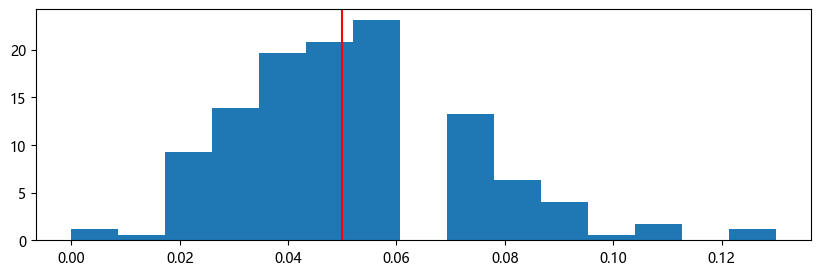

In [113]:
plt.figure(figsize=(10, 3))
plt.hist(results, bins=15, density=True)
plt.axvline(alpha, c="red");

In [151]:
obs = np.array([
    [sim_ci() for i in range(100)] 
    for j in range(200)
])
obs.shape

(200, 100, 2)

In [156]:
obs[0, 1:5]

array([[ 99.38398146, 100.83749037],
       [ 99.27574841, 100.96468649],
       [ 98.78765263, 100.73658182],
       [ 99.39165426, 101.41489908]])

In [159]:
results = np.array([
    [ mu < lower or mu > upper for lower, upper in obs[i]]
    for i in range(200)
])
results

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [154]:
results.mean(axis=1)

array([0.04, 0.05, 0.05, 0.02, 0.05, 0.07, 0.02, 0.06, 0.05, 0.05, 0.03,
       0.02, 0.02, 0.03, 0.07, 0.06, 0.06, 0.03, 0.04, 0.03, 0.06, 0.03,
       0.07, 0.07, 0.05, 0.03, 0.07, 0.05, 0.04, 0.04, 0.02, 0.03, 0.06,
       0.05, 0.02, 0.03, 0.04, 0.05, 0.07, 0.  , 0.03, 0.09, 0.07, 0.04,
       0.07, 0.02, 0.03, 0.05, 0.06, 0.04, 0.08, 0.06, 0.08, 0.11, 0.05,
       0.08, 0.04, 0.09, 0.04, 0.07, 0.03, 0.07, 0.06, 0.08, 0.03, 0.07,
       0.06, 0.05, 0.07, 0.07, 0.05, 0.09, 0.03, 0.07, 0.05, 0.03, 0.01,
       0.06, 0.12, 0.01, 0.06, 0.09, 0.03, 0.06, 0.07, 0.04, 0.08, 0.04,
       0.1 , 0.03, 0.03, 0.09, 0.06, 0.09, 0.03, 0.08, 0.06, 0.01, 0.1 ,
       0.05, 0.07, 0.07, 0.09, 0.03, 0.11, 0.05, 0.05, 0.06, 0.08, 0.07,
       0.04, 0.03, 0.04, 0.03, 0.03, 0.05, 0.08, 0.08, 0.06, 0.08, 0.05,
       0.04, 0.05, 0.07, 0.03, 0.06, 0.03, 0.03, 0.04, 0.05, 0.03, 0.04,
       0.05, 0.08, 0.04, 0.05, 0.03, 0.07, 0.05, 0.05, 0.04, 0.04, 0.04,
       0.11, 0.06, 0.05, 0.04, 0.08, 0.03, 0.04, 0.

In [162]:
np.apply_along_axis(lambda ci: mu < ci[0] or mu > ci[1], 2, obs)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

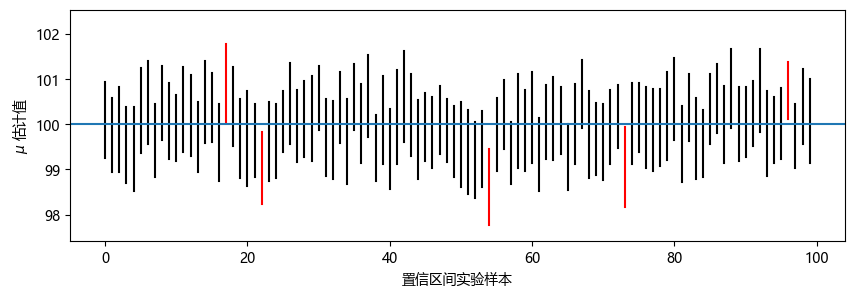

In [210]:
fig, ax = plt.subplots(figsize=(10,3))
for i, ci in enumerate(obs[1]):
    c = 'k' if ci[0] <= mu <= ci[1] else 'red'
    ax.plot([i, i], [ci[0], ci[1]], c=c)
    # ax.axvline(i, ymin=ci[0], ymax=ci[1], c='b')
ax.set_ylim(obs.min(), obs.max())
ax.axhline(y=100)
ax.set_xlabel('置信区间实验样本'); ax.set_ylabel('$\mu$ 估计值');